# Attribute types across the whole dataset

A notebook that display attribute type data across the whole dataset.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# install libraries
!pip install -r ../requirements.txt

# import libraries
import visualising_poetry.data as vpd
import visualising_poetry.plot as vpp
import visualising_poetry.widgets as vpw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
import ipywidgets as widgets
from IPython.display import display, HTML

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Distinct attribution types

The dataset has the following distinct attribution types. Note that Pandas converts 
n/a values from the Excel files into NaN.

In [2]:
types_count = df['attribution type'].unique()
display(types_count)

array(['m.pseud', 'm.d.e.', 'nan', 'p/n', 'ini', 'f.d.e.', 'f.pseud',
       'illegible', 'information missing', 'f.pseud/f.d.e.'], dtype=object)

## Numbers of attribution types

Calculate the number of occurrences that an attribution occurs against the whole dataset, and give a % of that
count against the total:

,attribution type,occurrences,% of total
0,nan,6428,62.742801
1,p/n,1263,12.327965
2,ini,1144,11.166423
3,m.pseud,865,8.443143
4,m.d.e.,316,3.084431
5,f.pseud,122,1.190825
6,f.d.e.,103,1.005368
7,information missing,2,0.019522
8,illegible,1,0.009761
9,f.pseud/f.d.e.,1,0.009761


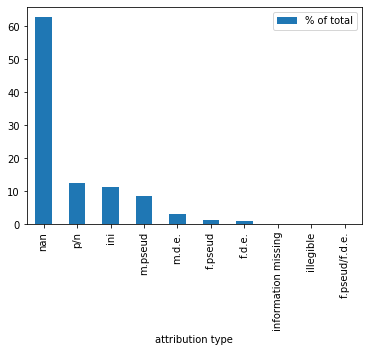

In [3]:
attr_type_count = vpd.attribute_types_total_df(df)

# display results in a table
display(HTML(attr_type_count.to_html()))

# display % in a plot
attr_type_count.plot(kind='bar', x=vpd.ATTR_TYPE, y='% of total')
plot.show()

## Occurrences of attribute types across the whole dataset by year

Show all of the attribute types (except n/a) across the dataset by year.

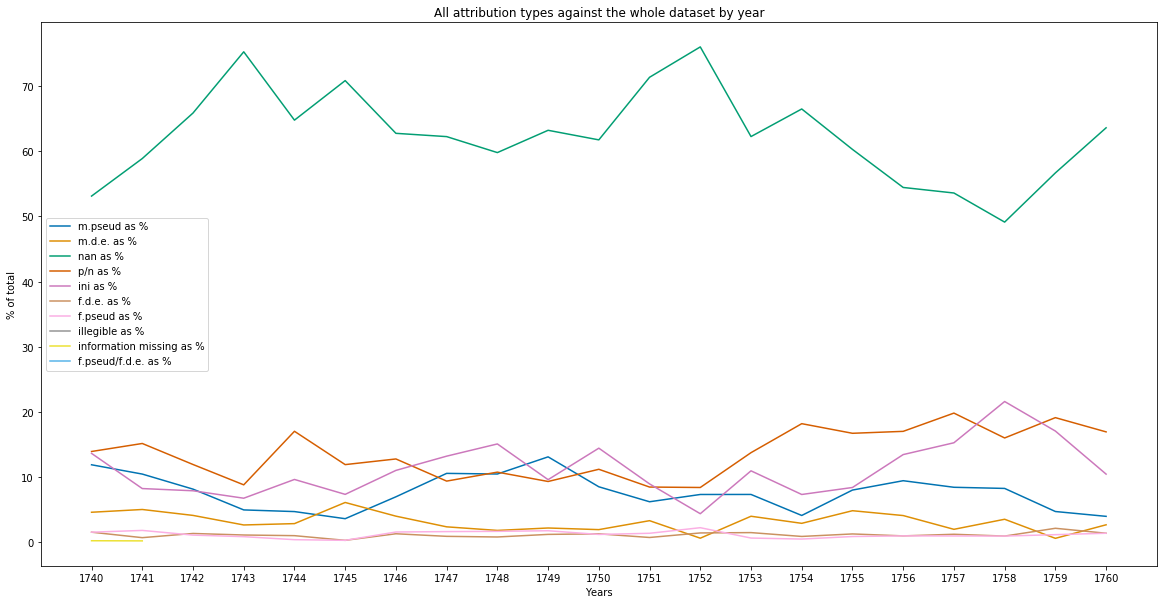

In [4]:
# data frame of attribute types across the whole data set
attr_types = vpd.attribution_types_overview_df(df)

# this dataset has raw numbers and %, we just need %
pc_cols = []
for attr_col in attr_types.columns.array:
    if ' as %' in attr_col:
        pc_cols.append(attr_col)

# just get the %
attr_types_pc = attr_types[pc_cols]

# print date leaks into 1761 (remove it)
attr_types_pc = attr_types_pc.drop(index=1761)

# plot the data
vpp.attribution_types_line_plot(attr_types_pc, "All attribution types against the whole dataset by year")

## Occurrences of attribute types (apart from na) across the whole dataset by year

Show all of the attribute types across the dataset by year.

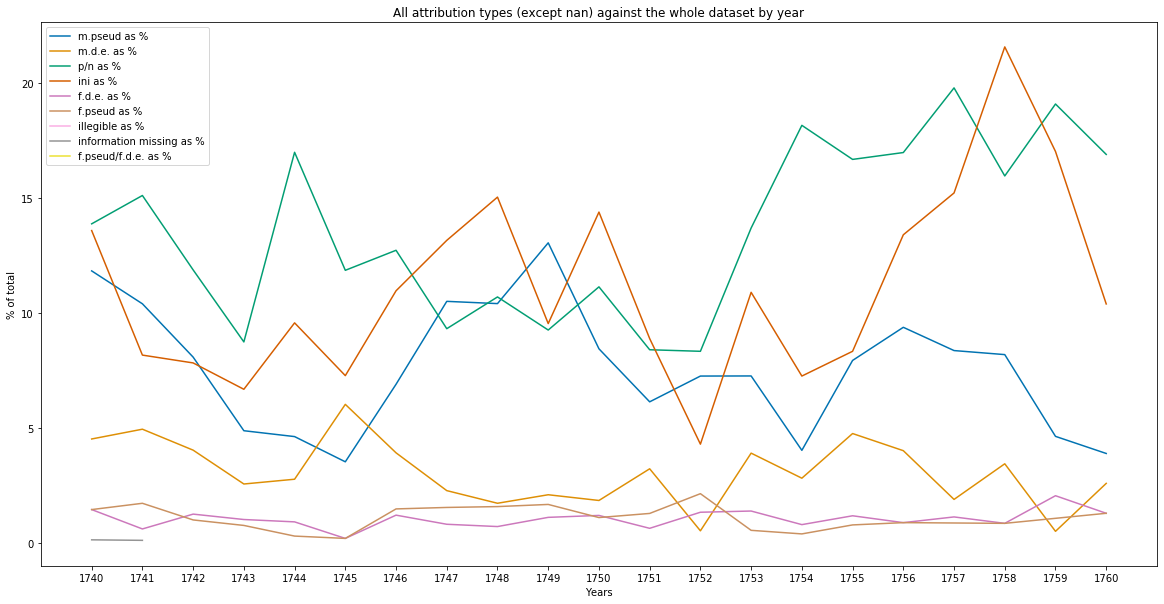

In [5]:
attr_types_pc = attr_types_pc.drop(['nan as %'], axis=1)
vpp.attribution_types_line_plot(attr_types_pc, "All attribution types (except nan) against the whole dataset by year")
